PGM CBPDN Solver
==================

This example demonstrates the use of a PGM solver for a convolutional sparse coding problem with a greyscale signal [[12]](http://sporco.rtfd.org/en/latest/zreferences.html#chalasani-2013-fast) [[50]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-efficient)

  $$\mathrm{argmin}_\mathbf{x} \; \frac{1}{2} \left\| \sum_m \mathbf{d}_m * \mathbf{x}_{m} - \mathbf{s} \right\|_2^2 + \lambda \sum_m \| \mathbf{x}_{m} \|_1 \;,$$

where $\mathbf{d}_{m}$ is the $m^{\text{th}}$ dictionary filter, $\mathbf{x}_{m}$ is the coefficient map corresponding to the $m^{\text{th}}$ dictionary filter, and $\mathbf{s}$ is the input image.

In [1]:
from __future__ import print_function
from builtins import input

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco import util
from sporco import signal
from sporco import plot
plot.config_notebook_plotting()
from sporco.metric import psnr
from sporco.pgm import cbpdn
from sporco.pgm.backtrack import BacktrackStandard

Load example image.

In [2]:
img = util.ExampleImages().image('kodim23.png', scaled=True, gray=True,
                                 idxexp=np.s_[160:416,60:316])

Highpass filter example image.

In [3]:
npd = 16
fltlmbd = 10
sl, sh = signal.tikhonov_filter(img, fltlmbd, npd)

Load dictionary and display it.

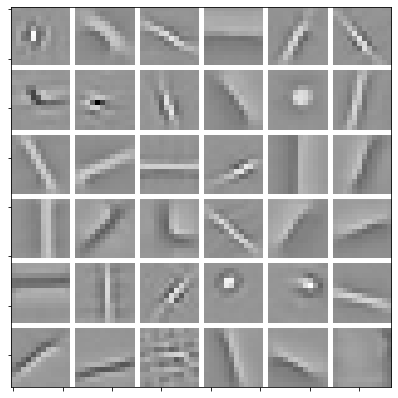

In [4]:
D = util.convdicts()['G:12x12x36']
plot.imview(util.tiledict(D), fgsz=(7, 7))

Set [pgm.cbpdn.ConvBPDN](http://sporco.rtfd.org/en/latest/modules/sporco.pgm.cbpdn.html#sporco.pgm.cbpdn.ConvBPDN) solver options. Note the possibility of changing parameters in the backtracking algorithm.

In [5]:
lmbda = 5e-2
L = 1.
opt = cbpdn.ConvBPDN.Options({
    'Verbose': True, 'MaxMainIter': 250, 'RelStopTol': 1e-4, 'L': L,
    'Backtrack': BacktrackStandard(maxiter=15)})

Initialise and run CSC solver.

In [6]:
b = cbpdn.ConvBPDN(D, sh, lmbda, opt, dimK=0)
X = b.solve()
print("ConvBPDN solve time: %.2fs" % b.timer.elapsed('solve'))

Itn   Fnc       DFid      Regℓ1     Rsdl      F         Q         It_Bt  L       
---------------------------------------------------------------------------------


   0  7.57e+03  7.32e+03  5.16e+03  1.53e+02  2.42e+08  -3.55e+07     15  1.54e+01


   1  5.34e+02  4.04e+02  2.59e+03  7.69e+01  1.33e+07  3.41e+07     14  1.65e+02
   2  1.26e+02  4.41e+01  1.64e+03  5.86e+00  1.45e+06  1.78e+06      1  1.65e+02
   3  6.55e+01  8.57e+00  1.14e+03  6.71e-01  2.83e+05  5.48e+05      1  1.65e+02


   4  4.73e+01  6.13e+00  8.24e+02  1.61e-01  2.02e+05  3.58e+05      1  1.65e+02
   5  3.92e+01  7.44e+00  6.36e+02  4.71e-02  2.46e+05  3.28e+05      1  1.65e+02
   6  3.58e+01  8.77e+00  5.41e+02  1.91e-02  2.90e+05  3.35e+05      1  1.65e+02


   7  3.43e+01  9.36e+00  4.99e+02  1.07e-02  3.10e+05  3.37e+05      1  1.65e+02
   8  3.33e+01  9.23e+00  4.82e+02  6.48e-03  3.06e+05  3.22e+05      1  1.65e+02
   9  3.26e+01  8.74e+00  4.77e+02  3.61e-03  2.89e+05  2.99e+05      1  1.65e+02


  10  3.20e+01  8.17e+00  4.77e+02  2.11e-03  2.70e+05  2.76e+05      1  1.65e+02
  11  3.15e+01  7.67e+00  4.77e+02  1.41e-03  2.54e+05  2.58e+05      1  1.65e+02
  12  3.11e+01  7.29e+00  4.77e+02  1.08e-03  2.42e+05  2.45e+05      1  1.65e+02


  13  3.08e+01  7.01e+00  4.76e+02  9.11e-04  2.32e+05  2.35e+05      1  1.65e+02
  14  3.05e+01  6.81e+00  4.74e+02  8.07e-04  2.26e+05  2.28e+05      1  1.65e+02
  15  3.02e+01  6.66e+00  4.71e+02  7.17e-04  2.21e+05  2.23e+05      1  1.65e+02


  16  3.00e+01  6.54e+00  4.68e+02  6.48e-04  2.17e+05  2.19e+05      1  1.65e+02
  17  2.97e+01  6.45e+00  4.65e+02  6.01e-04  2.14e+05  2.16e+05      1  1.65e+02
  18  2.95e+01  6.38e+00  4.62e+02  5.63e-04  2.12e+05  2.13e+05      1  1.65e+02


  19  2.93e+01  6.31e+00  4.60e+02  5.17e-04  2.09e+05  2.11e+05      1  1.65e+02
  20  2.91e+01  6.26e+00  4.57e+02  4.82e-04  2.08e+05  2.09e+05      1  1.65e+02
  21  2.89e+01  6.21e+00  4.54e+02  4.44e-04  2.06e+05  2.07e+05      1  1.65e+02


  22  2.88e+01  6.17e+00  4.52e+02  4.23e-04  2.05e+05  2.06e+05      1  1.65e+02
  23  2.86e+01  6.13e+00  4.49e+02  3.88e-04  2.03e+05  2.04e+05      1  1.65e+02
  24  2.85e+01  6.09e+00  4.47e+02  3.62e-04  2.02e+05  2.03e+05      1  1.65e+02


  25  2.83e+01  6.06e+00  4.45e+02  3.49e-04  2.01e+05  2.02e+05      1  1.65e+02
  26  2.82e+01  6.03e+00  4.43e+02  3.25e-04  2.00e+05  2.01e+05      1  1.65e+02
  27  2.81e+01  6.00e+00  4.41e+02  3.10e-04  1.99e+05  2.00e+05      1  1.65e+02


  28  2.79e+01  5.97e+00  4.39e+02  2.92e-04  1.98e+05  1.99e+05      1  1.65e+02
  29  2.78e+01  5.95e+00  4.38e+02  2.69e-04  1.97e+05  1.98e+05      1  1.65e+02
  30  2.77e+01  5.92e+00  4.36e+02  2.59e-04  1.97e+05  1.97e+05      1  1.65e+02


  31  2.76e+01  5.90e+00  4.34e+02  2.56e-04  1.96e+05  1.96e+05      1  1.65e+02
  32  2.75e+01  5.88e+00  4.33e+02  2.40e-04  1.95e+05  1.96e+05      1  1.65e+02
  33  2.74e+01  5.86e+00  4.32e+02  2.30e-04  1.94e+05  1.95e+05      1  1.65e+02


  34  2.73e+01  5.84e+00  4.30e+02  2.16e-04  1.94e+05  1.94e+05      1  1.65e+02
  35  2.73e+01  5.82e+00  4.29e+02  2.05e-04  1.93e+05  1.94e+05      1  1.65e+02
  36  2.72e+01  5.81e+00  4.28e+02  1.95e-04  1.93e+05  1.93e+05      1  1.65e+02


  37  2.71e+01  5.79e+00  4.26e+02  1.82e-04  1.92e+05  1.93e+05      1  1.65e+02
  38  2.70e+01  5.78e+00  4.25e+02  1.74e-04  1.92e+05  1.92e+05      1  1.65e+02
  39  2.70e+01  5.77e+00  4.24e+02  1.59e-04  1.91e+05  1.92e+05      1  1.65e+02


  40  2.69e+01  5.76e+00  4.23e+02  1.63e-04  1.91e+05  1.92e+05      1  1.65e+02
  41  2.68e+01  5.75e+00  4.22e+02  1.47e-04  1.91e+05  1.91e+05      1  1.65e+02
  42  2.68e+01  5.74e+00  4.21e+02  1.51e-04  1.90e+05  1.91e+05      1  1.65e+02


  43  2.67e+01  5.72e+00  4.20e+02  1.49e-04  1.90e+05  1.90e+05      1  1.65e+02
  44  2.67e+01  5.71e+00  4.19e+02  1.39e-04  1.90e+05  1.90e+05      1  1.65e+02
  45  2.66e+01  5.70e+00  4.19e+02  1.30e-04  1.89e+05  1.90e+05      1  1.65e+02


  46  2.66e+01  5.69e+00  4.18e+02  1.24e-04  1.89e+05  1.89e+05      1  1.65e+02
  47  2.65e+01  5.68e+00  4.17e+02  1.18e-04  1.89e+05  1.89e+05      1  1.65e+02
  48  2.65e+01  5.68e+00  4.16e+02  1.13e-04  1.88e+05  1.89e+05      1  1.65e+02


  49  2.64e+01  5.67e+00  4.15e+02  1.12e-04  1.88e+05  1.88e+05      1  1.65e+02
  50  2.64e+01  5.66e+00  4.15e+02  9.99e-05  1.88e+05  1.88e+05      1  1.65e+02
---------------------------------------------------------------------------------
ConvBPDN solve time: 8.18s


Reconstruct image from sparse representation.

In [7]:
shr = b.reconstruct().squeeze()
imgr = sl + shr
print("Reconstruction PSNR: %.2fdB\n" % psnr(img, imgr))

Reconstruction PSNR: 37.11dB



Display low pass component and sum of absolute values of coefficient maps of highpass component.

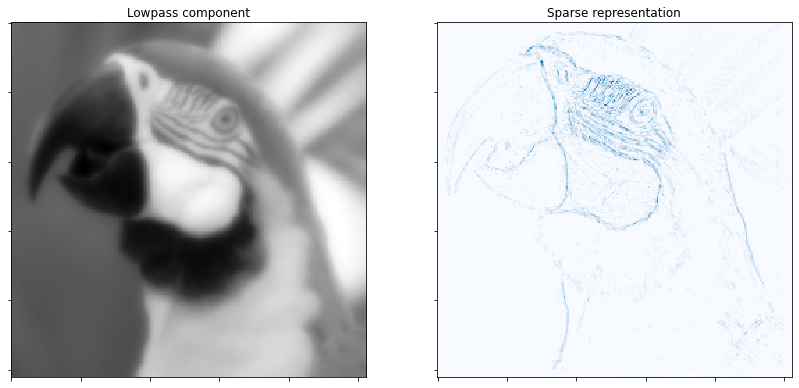

In [8]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(sl, title='Lowpass component', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(np.sum(abs(X), axis=b.cri.axisM).squeeze(), cmap=plot.cm.Blues,
            title='Sparse representation', fig=fig)
fig.show()

Display original and reconstructed images.

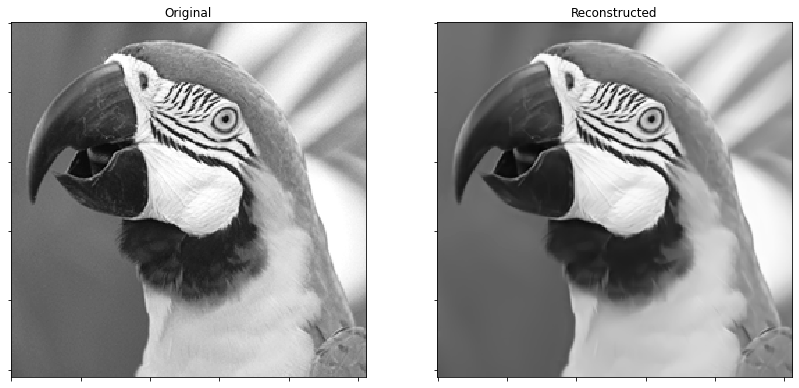

In [9]:
fig = plot.figure(figsize=(14, 7))
plot.subplot(1, 2, 1)
plot.imview(img, title='Original', fig=fig)
plot.subplot(1, 2, 2)
plot.imview(imgr, title='Reconstructed', fig=fig)
fig.show()

Get iterations statistics from solver object and plot functional value, residual, and inverse step size parameter against the iteration number.

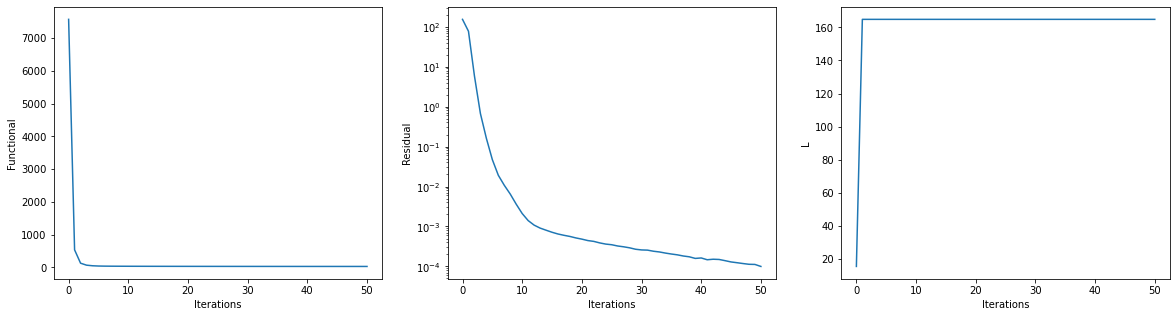

In [10]:
its = b.getitstat()
fig = plot.figure(figsize=(20, 5))
plot.subplot(1, 3, 1)
plot.plot(its.ObjFun, xlbl='Iterations', ylbl='Functional', fig=fig)
plot.subplot(1, 3, 2)
plot.plot(its.Rsdl, ptyp='semilogy', xlbl='Iterations', ylbl='Residual',
          fig=fig)
plot.subplot(1, 3, 3)
plot.plot(its.L, xlbl='Iterations', ylbl='L', fig=fig)
fig.show()